In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = 'latin_1', names= ['target', 'id','date','flag','user','text'])
df = df[['target', 'date', 'text']]
df['target'] = df['target'].map({0: 0, 4: 1})
df['sentiment'] = df['target'].map({0: 'Negative', 1: 'Positive'})
df.sample(10)

,target,date,text,sentiment
820263,1,Sat Apr 18 14:54:45 PDT 2009,TPB Sez: Don't worry - we're from the internet...,Positive
1156780,1,Sun May 31 01:44:15 PDT 2009,"time to head out, get a starbucks, do shoppin...",Positive
226772,0,Sat May 30 22:01:11 PDT 2009,@tiffunnyfranco awww that's mean! But the hil ...,Negative
424523,0,Sun Jun 07 01:26:04 PDT 2009,@givemestrength Such a good way to engender re...,Negative
1399752,1,Sat Jun 06 07:01:15 PDT 2009,@AstroBoyRetro Yes! Going to Newbury for inter...,Positive
1328579,1,Wed Jun 03 04:56:02 PDT 2009,@dutchcelt check out my blog if u like Thai co...,Positive
1390833,1,Sat Jun 06 03:54:18 PDT 2009,Hey Guyss Weekend... and then back to school....,Positive
1562496,1,Mon Jun 15 19:24:30 PDT 2009,@Miranda_WHTLaw They don't stand a chance.,Positive
1268116,1,Mon Jun 01 21:11:05 PDT 2009,@ddlovato http://twitpic.com/6g3tt - you look ...,Positive
745646,0,Mon Jun 22 11:26:55 PDT 2009,A bird pooped on me @ the zooo..... fml!!,Negative


In [13]:
subset_df = df.sample(1000, random_state = 42)
subset_df.to_csv('Sentiment140_subset.csv', index = False)

In [14]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(1600000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1600000 non-null  int64 
 1   date       1600000 non-null  object
 2   text       1600000 non-null  object
 3   sentiment  1600000 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB
None
target       0
date         0
text         0
sentiment    0
dtype: int64


In [15]:
sentiment_counts = df.sentiment.value_counts()
print(sentiment_counts)

sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64


In [16]:
sentiment_dist = df.sentiment.value_counts(normalize = True)*100
print(sentiment_dist)

sentiment
Negative    50.0
Positive    50.0
Name: proportion, dtype: float64


In [22]:
import plotly.express as px

fig_pie = px.pie(sentiment_counts, values = sentiment_counts, title ="Sentiment Distribution")
fig_pie.show()

In [23]:
df['Char_length'] = df['text'].apply(len)
df['Word_length'] = df['text'].apply(lambda x: len(x.split()))
print(df[['Char_length', 'Word_length']].describe())

        Char_length   Word_length
count  1.600000e+06  1.600000e+06
mean   7.409011e+01  1.317615e+01
std    3.644114e+01  6.957978e+00
min    6.000000e+00  1.000000e+00
25%    4.400000e+01  7.000000e+00
50%    6.900000e+01  1.200000e+01
75%    1.040000e+02  1.900000e+01
max    3.740000e+02  6.400000e+01


In [24]:
length_stats = df.groupby('sentiment')[['Char_length','Word_length']].mean()
print(length_stats)

           Char_length  Word_length
sentiment                          
Negative     74.301790    13.581984
Positive     73.878433    12.770318


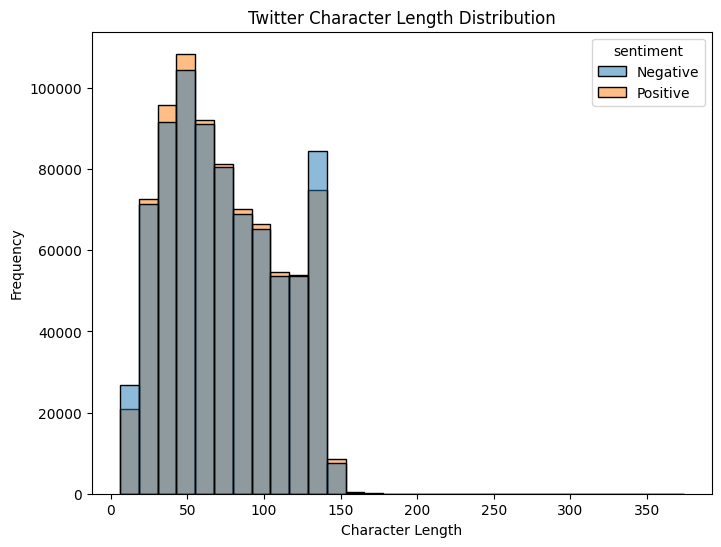

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt



fig , ax = plt.subplots(figsize = (8, 6))
sns.histplot(data = df, x = 'Char_length', hue = 'sentiment', bins = 30, ax = ax )
ax.set_title('Twitter Character Length Distribution')
ax.set_xlabel('Character Length')
ax.set_ylabel('Frequency')
plt.savefig('Length_Dist.png')
plt.show()

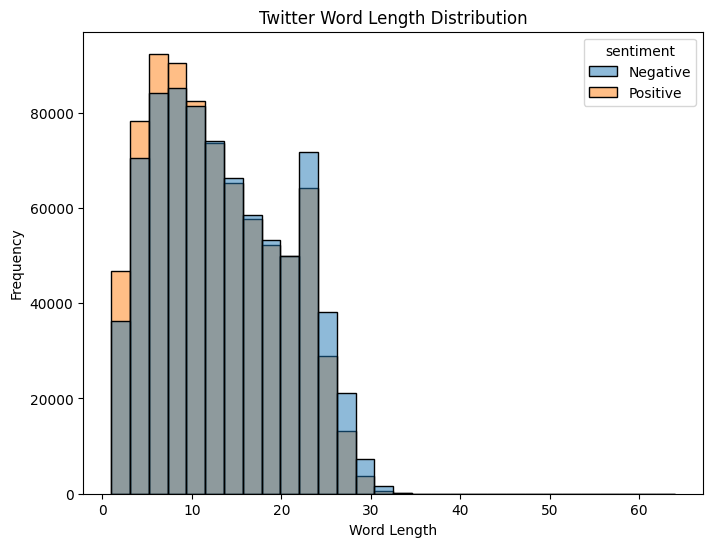

In [26]:
fig , ax = plt.subplots(figsize = (8, 6))
sns.histplot(data = df, x = 'Word_length', hue = 'sentiment', bins = 30, ax = ax )
ax.set_title('Twitter Word Length Distribution')
ax.set_xlabel('Word Length')
ax.set_ylabel('Frequency')
plt.savefig('Word_Dist.png')
plt.show()

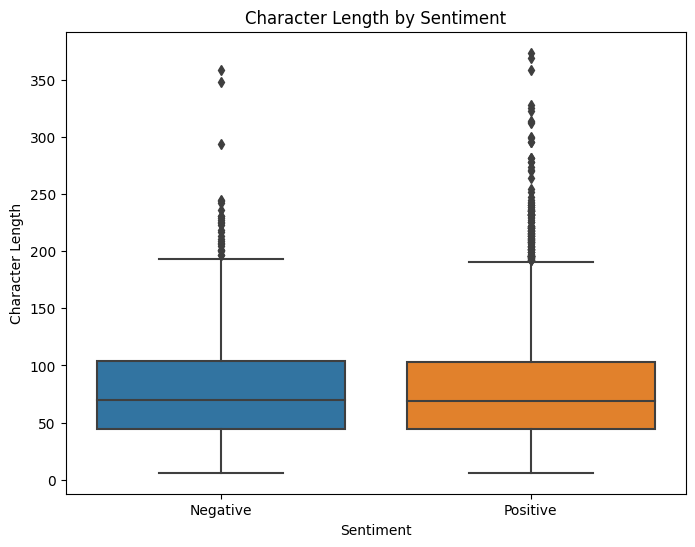

In [27]:
fig , ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data = df, x = 'sentiment', y = 'Char_length' )
ax.set_title('Character Length by Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Character Length')
plt.savefig('Length_Box.png')
plt.show()

In [28]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import emoji
from wordcloud import WordCloud

In [29]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s#]', '',text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

In [31]:
df['Clean_text'] = df['text'].apply(clean_text)
subset_df['Clean_text'] = subset_df['text'].apply(clean_text)

In [32]:
pos_text = ' '.join(df[df['sentiment'] == 'Positive']['Clean_text'])
neg_text = ' '.join(df[df['sentiment'] == 'Negative']['Clean_text'])

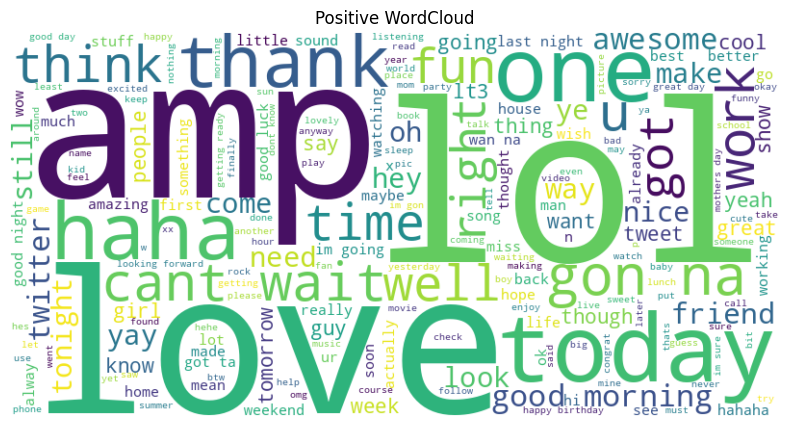

In [33]:
pos_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(pos_text)
plt.figure(figsize = (10, 5))
plt.imshow(pos_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive WordCloud')
plt.savefig('pos_wordcloud.png')
plt.show()

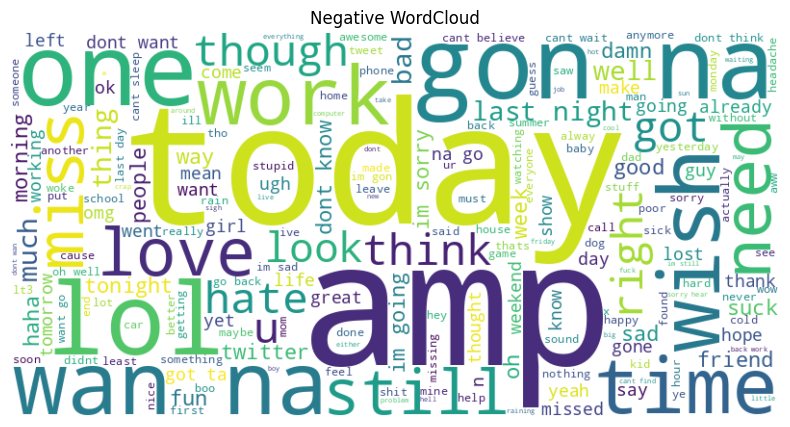

In [34]:
neg_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(neg_text)
plt.figure(figsize = (10, 5))
plt.imshow(neg_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative WordCloud')
plt.savefig('neg_wordcloud.png')
plt.show()

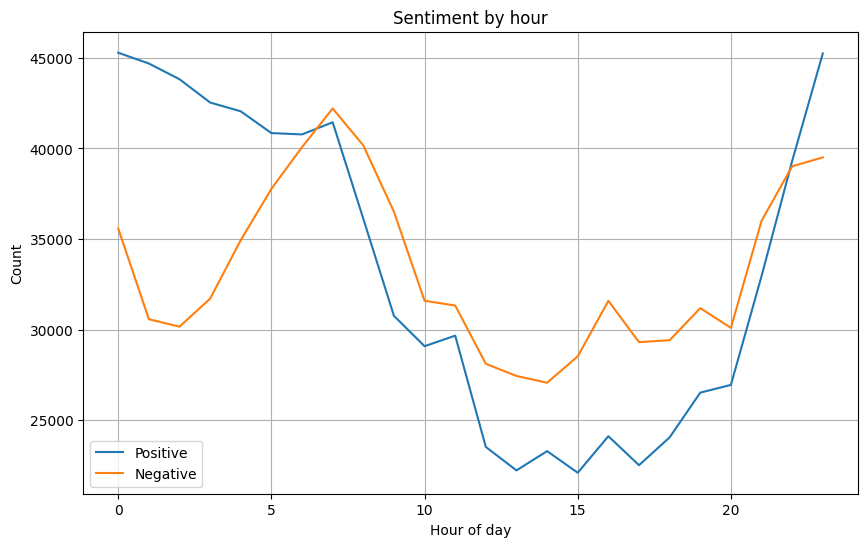

In [35]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df.date.dt.hour
hourly_sentiment = df.groupby(['hour', 'sentiment']).size().unstack().fillna(0)
hourly_sentiment_reset = hourly_sentiment.reset_index()
plt.figure(figsize =(10, 6))
sns.lineplot(data = hourly_sentiment_reset, x ='hour', y = 'Positive', label = 'Positive')
sns.lineplot(data = hourly_sentiment_reset, x = 'hour', y = 'Negative', label = 'Negative')
plt.title('Sentiment by hour')
plt.xlabel('Hour of day')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.savefig('temporal_line.png')
plt.show()


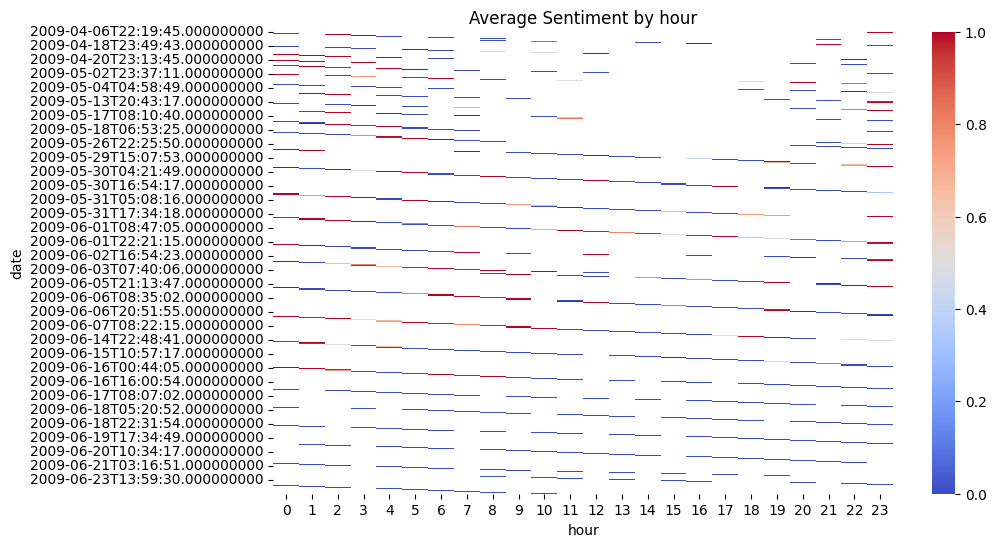

In [37]:
day_hour = pd.pivot_table(data = df, index = 'date', columns = 'hour', values = 'target', aggfunc = 'mean')
plt.figure(figsize = (10 , 6))
sns.heatmap(data = day_hour, cmap = 'coolwarm')
plt.title('Average Sentiment by hour')
plt.savefig('temporal_heatmap.png')
plt.show()

In [39]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


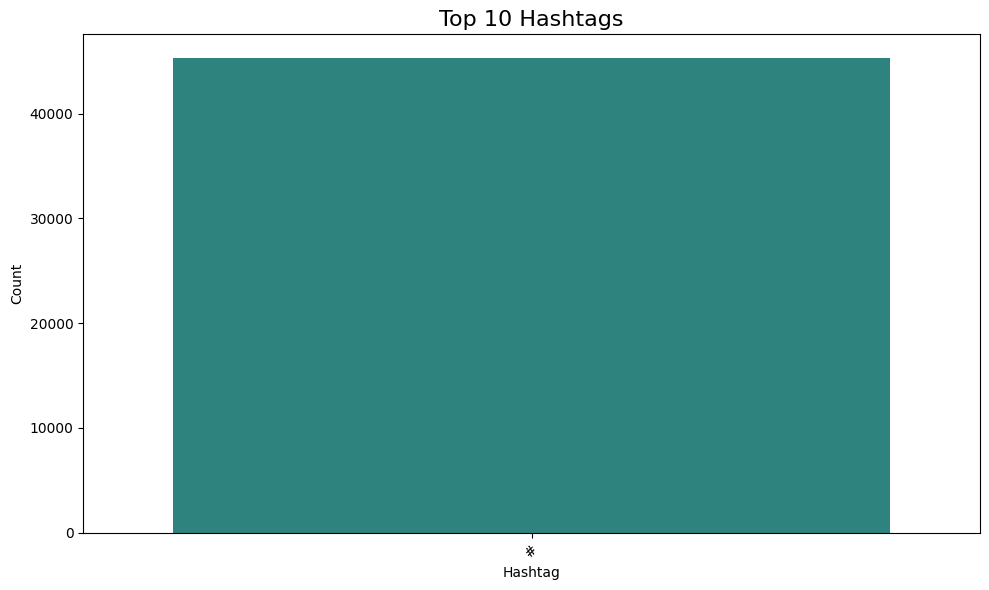

In [45]:
hashtags = Counter(
    [word for text in df['Clean_text'] for word in text.split() if word.startswith('#')]
)
hashtags_df = pd.DataFrame(hashtags.most_common(10), columns=['Hashtag', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(data=hashtags_df, x='Hashtag', y='Count', palette='viridis')

plt.title('Top 10 Hashtags', fontsize=16)
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('hashtag_bar.png', dpi=300)
plt.show()

In [41]:
import numpy as np
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from tqdm import tqdm

2025-07-01 21:22:36.345833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751404956.607353      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751404956.674647      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [42]:
import numpy as np
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from tqdm import tqdm

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


batch_size = 64
num_batches = int(np.ceil(len(df) / batch_size))

predictions = []

for i in tqdm(range(num_batches), desc="Processing Batches"):
    batch_texts = df['Clean_text'].iloc[i * batch_size : (i + 1) * batch_size].tolist()
    inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='tf')
    outputs = model(inputs, training=False)
    batch_preds = tf.argmax(outputs.logits, axis=1).numpy()
    predictions.extend(batch_preds)


df['predicted_sentiment'] = predictions


df.to_csv("tweets_with_sentiment.csv", index=False)
print("✅ Sentiment predictions saved to 'tweets_with_sentiment.csv'")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

I0000 00:00:1751404989.050643      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751404989.051223      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Processing Batches: 100%|██████████| 25000/25000 [44:30<00:00,  9.36it/s] 


✅ Sentiment predictions saved to 'tweets_with_sentiment.csv'


In [50]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(df['target'],df['predicted_sentiment'])
f1 = f1_score(df['target'], df['predicted_sentiment'])
cm = confusion_matrix(df['target'], df['predicted_sentiment'])

print(f'Accuracy:{accuracy:.4f}')
print(f'F1_score:{f1:.4f}')
print(f'Confusion Martrix: {cm}')

Accuracy:0.6762
F1_score:0.6416
Confusion Martrix: [[618109 181891]
 [336193 463807]]


In [51]:
model.save_pretrained('./distilbert_sentiment')
tokenizer.save_pretrained('./distilbert_sentiment')

('./distilbert_sentiment/tokenizer_config.json',
 './distilbert_sentiment/special_tokens_map.json',
 './distilbert_sentiment/vocab.txt',
 './distilbert_sentiment/added_tokens.json')

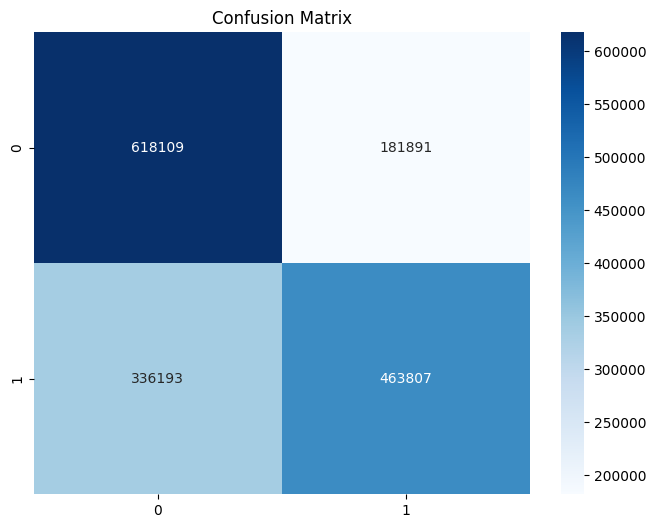

In [53]:
cm = confusion_matrix(df['target'],df['predicted_sentiment'])
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [55]:
api_df = pd.DataFrame({
    'text': ['I love #AI!', 'This #AI is terrible', '#AI is the future', 'Hate #AI bugs', '#AI changes everything 😊'],
    'clean_text': ['love #ai', 'terrible #ai', '#ai future', 'hate #ai bugs', '#ai changes everything']
})


def predict_sentiment(tweet, model, tokenizer):
    inputs = tokenizer(tweet, return_tensors='tf', truncation=True, padding=True, max_length=128)
    outputs = model(inputs, training=False)
    probs = tf.nn.softmax(outputs.logits, axis=1)
    pred = tf.argmax(probs, axis=1).numpy()[0]
    score = probs[0][pred].numpy()
    sentiment = 'Positive' if pred == 1 else 'Negative'
    return sentiment, score


predictions = []
scores = []

for tweet in api_df['clean_text']:
    sentiment, score = predict_sentiment(tweet, model, tokenizer)
    predictions.append(sentiment)
    scores.append(score)

api_df['sentiment'] = predictions
api_df['confidence'] = scores

# Save to CSV
api_df.to_csv('predicted_tweets.csv', index=False)
print("✅ Predictions saved to 'predicted_tweets.csv'")

✅ Predictions saved to 'predicted_tweets.csv'


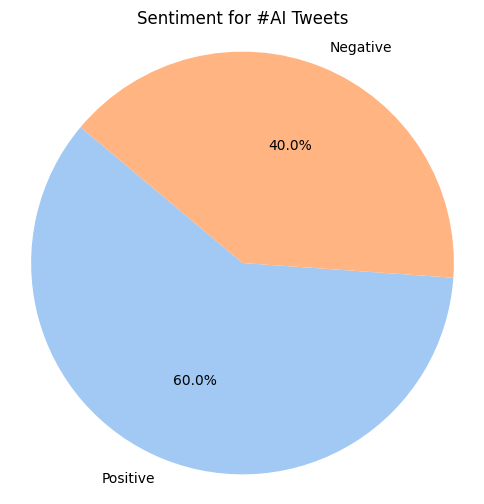

In [56]:
sentiment_counts = api_df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel')[0:len(sentiment_counts)]

plt.pie(sentiment_counts.values,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)

plt.title('Sentiment for #AI Tweets')
plt.axis('equal') 
plt.savefig('api_sentiment_pie.png', dpi=300)
plt.show()

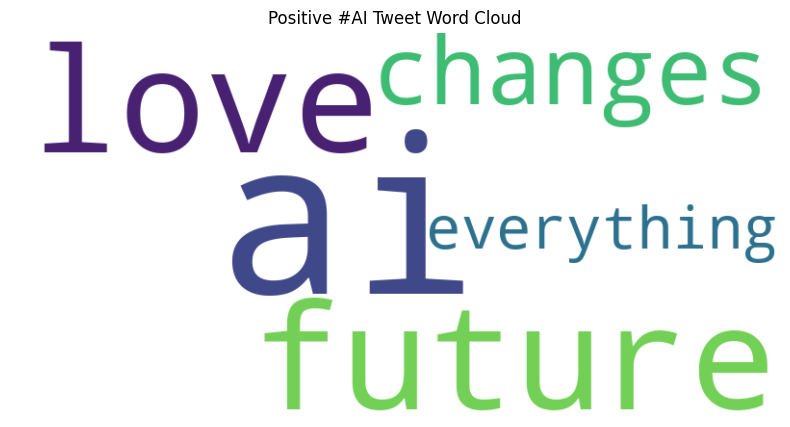

In [58]:
pos_tweets = api_df[api_df['sentiment'] == 'Positive']['clean_text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive #AI Tweet Word Cloud')
plt.savefig('api_wordcloud.png')
plt.show()

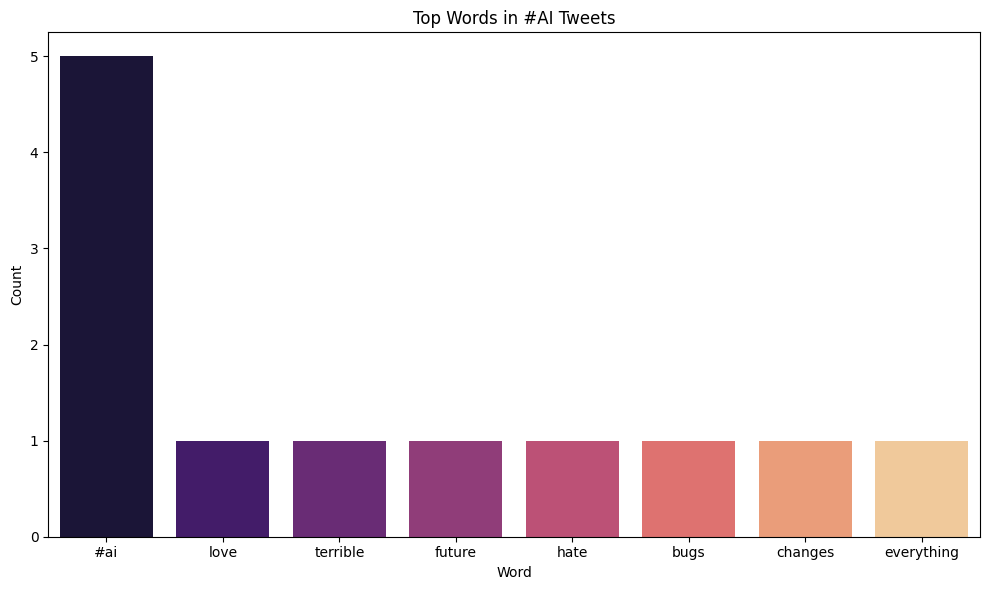

In [59]:
words = ' '.join(api_df['clean_text']).split()
word_freq = Counter(words).most_common(10)
word_df = pd.DataFrame(word_freq, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='Word', y='Count', palette='magma')

plt.title('Top Words in #AI Tweets')
plt.xlabel('Word')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('api_word_bar.png', dpi=300)
plt.show()

In [60]:
import shutil

shutil.make_archive("distilbert_sentiment", 'zip', "distilbert_sentiment")

'/kaggle/working/distilbert_sentiment.zip'

In [61]:
from IPython.display import FileLink

FileLink("distilbert_sentiment.zip")

/kaggle/working/distilbert_sentiment.zip

In [62]:
from IPython.display import FileLink

FileLink('predicted_tweets.csv')

/kaggle/working/tweets_with_sentiment.csv

In [63]:
FileLink('predicted_tweets.csv')

/kaggle/working/predicted_tweets.csv

In [68]:
import zipfile
import os

image_files = [f for f in os.listdir() if f.endswith('.png')]
print("Zipping the following image files:", image_files)

with zipfile.ZipFile('tweet_images.zip', 'w') as zipf:
    for file in image_files:
        zipf.write(file)

print("Zipping done!")

Zipping the following image files: ['confusion_matrix.png', 'Length_Box.png', 'temporal_line.png', 'api_wordcloud.png', 'api_sentiment_pie.png', 'Length_Dist.png', 'Word_Dist.png', 'neg_wordcloud.png', 'api_word_bar.png', 'hashtag_bar.png', 'pos_wordcloud.png', 'temporal_heatmap.png']
Zipping done!


In [69]:
FileLink("tweet_images.zip")

/kaggle/working/tweet_images.zip

In [70]:
FileLink('Sentiment Analysis with flask.ipynb')

/kaggle/working/Sentiment Analysis with flask.ipynb